# Calculate robusteness from pi control runs

In [208]:
# Some definitions

# directory of data
#fdir = '~/Google Drive/professional/research/FARALLON_INSTITUTE_PROJECTS/2020 NOAA MAPP/Climate_extremes_sharedfigsandcode/data/FOR SCATTER PLOT/'
fdir = '/Volumes/GoogleDrive/My Drive/Climate_extremes_sharedfigsandcode/data/Annual_TimeSeries/'

In [209]:
# Modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages
import seaborn as sns

In [210]:
#detrend function: detrend use polynomial fit
def detrend(x,y,degree):
    import statsmodels.formula.api as smf
    import numpy as np
    import pandas as pd
    

    df = pd.DataFrame(columns=['y', 'x'])
    df['x'] = x
    df['y'] = pd.Series(y)   #y

    idx = np.isfinite(x) & np.isfinite(y)
    weights = np.polyfit(x[idx], y[idx], degree)
    model = np.poly1d(weights)
    results = smf.ols(formula='y ~ model(x)', data=df).fit()

    p_value=results.f_pvalue
    r2=results.rsquared_adj

    detrend_ts=np.zeros(shape=(len(y),))
    detrend_ts[:] = np.nan
    detrend_ts[idx]=y[idx]-results.fittedvalues

    #plt.figure(figsize=(10,4))
    #plt.plot(x,y)
    #plt.plot(x[idx], results.fittedvalues, 'r')
    #plt.figure(figsize=(10,4))
    #plt.plot(x, detrend_ts)
    #plt.show()

    return p_value, r2, detrend_ts

In [211]:
def num_coevents(y1, y2, pct1, pct2,  runs='picontrol',loc='cclme'):
    # 
    fin1 = fdir+'original ts/'+runs+'_cclme_sst.nc'
    fin2 = fdir+'original ts/'+runs+'_goa_sst.nc'
    fin3 = fdir+'original ts/'+runs+'_sm.nc'

    modsst = xr.open_dataset(fin1)
    modsst.close()
    modsm2 = xr.open_dataset(fin2)
    modsm2.close()
    
    modsm = xr.open_dataset(fin3)
    modsm.close()    
    models = modsm.model

    # selec periood
    modsst = modsst.sel(year=slice(y1,y2))
    modsm2 = modsm2.sel(year=slice(y1-1,y2-1))
    modsm = modsm.sel(year=slice(y1-1,y2-1))
    
    nev = list()
    
    for ix,i in enumerate(models):
        #print(ix,i)
        tmp1_0= modsst.sel(model=i).sst.values
        tmp2_0= modsm2.sel(model=i).sst.values
        tmp3_0= modsm.sel(model=i).sm.values

        
        #detrend
        nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
        [p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
        nsample = np.linspace(1,len(tmp2_0), len(tmp2_0))
        [p_value, r2, tmp2]= detrend(nsample,tmp2_0,1)
        nsample = np.linspace(1,len(tmp3_0), len(tmp3_0))
        [p_value, r2, tmp3]= detrend(nsample,tmp3_0,1)
        
        # calculate threshold
        mhw_thr = np.nanpercentile(tmp1,pct1)
        drg_thr = np.nanpercentile(tmp2,pct1)
        drg_thr2 = np.nanpercentile(tmp3,pct2)
    
        a1 = tmp1>=mhw_thr
        a2 = tmp2>=drg_thr
        a3 = tmp3<=drg_thr2  
        
        tmp = np.full((len(modsst.year.values),1),1)
        tmp = tmp[a1*a2*a3] #a1*
        if len(tmp)is 0:
            per=len(tmp)
        else:
            tmp1 = np.full((len(modsst.year.values),1),1)
            tmp1 = tmp1[a2*a3]            
        per=len(tmp) /len(tmp1)       
    
        #nev.append(per*100)#/(y2-y1+1)) #freq.
        nev.append(len(tmp)/30*100)#/(y2-y1+1)) #freq.
        
    return nev  # sum(nev)

In [212]:
ny = 30
prc1 = 90
prc2 = 10
loc='cclme'

pinev=list()
for i in range(int(500/ny)):
    nev = num_coevents(i*ny+2, (i+1)*ny+1, prc1, prc2,loc=loc)
    pinev.append(nev)
pinev 

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.3333333333333335,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.3333333333333335,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  3.3333333333333335,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [3.3333333333333335,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0

In [213]:

#model by model

In [214]:
model_mean=np.mean(pinev,axis=0)
model_spread=np.std(pinev,axis=0)
IV=(np.sum((model_spread*model_spread))/22)**.5
IV,model_spread

(0.7311930716854531,
 array([1.10239638, 0.        , 1.10239638, 0.        , 0.        ,
        0.80687153, 0.80687153, 0.80687153, 0.        , 0.80687153,
        0.80687153, 0.        , 1.30104125, 0.        , 0.80687153,
        1.10239638, 1.10239638, 0.        , 0.80687153, 0.80687153,
        0.        , 0.        ]))

In [215]:
#16 30-yr periods MMEs

In [216]:
mme_mean=np.mean(pinev,axis=1)
mme_spread=np.std(pinev,axis=1)
#internal variability mean and spread
mme_mean,np.mean(mme_spread)

(array([0.15151515, 0.15151515, 0.15151515, 0.15151515, 0.        ,
        0.        , 0.15151515, 0.        , 0.15151515, 0.45454545,
        0.15151515, 0.15151515, 0.15151515, 0.15151515, 0.75757576,
        0.15151515]),
 0.6361525713738436)

In [217]:
#MME mean and spread

In [218]:
mme_model_mean=np.mean(mme_mean)
mme_model_spread=np.std(mme_mean)
mme_model_mean,mme_model_spread

(0.17992424242424243, 0.1794251450899282)

In [219]:
#cross model mean and spread

In [220]:
cross_model_mean=np.mean(model_mean)
cross_model_spread=np.std(model_mean)
cross_model_mean,cross_model_spread

(0.17992424242424243, 0.18091830657710986)

In [221]:
IV,cross_model_spread,mme_model_spread,np.std(pinev),np.std(pinev)-IV

(0.7311930716854531,
 0.18091830657710986,
 0.1794251450899282,
 0.7532428172478893,
 0.022049745562436218)

In [222]:
## Calculate thresholds for PI Control runs

In [223]:
def get_thre(fdir, runs,loc, y1,y2,prc1,prc2):
    # open data: anomalies (without trend)

    modsst = xr.open_dataset(fdir+'original ts/'+runs+'_cclme_sst.nc')
    modsst.close()
    modsm2 = xr.open_dataset(fdir+'original ts/'+runs+'_goa_sst.nc')
    modsm2.close()
    modsm = xr.open_dataset(fdir+'original ts/'+runs+'_sm.nc')
    modsm.close()
    
    # select period 
    modsst = modsst.sel(year=slice(y1,y2))
    modsm2 = modsm2.sel(year=slice(y1-1,y2-1))
    modsm = modsm.sel(year=slice(y1-1,y2-1))

    mhw_thr = list()
    drg_thr = list()
    drg_thr2 = list()
    models = list()

    # Calculate thresholds for each model
    for ix,i in enumerate(modsm.model.values):
        tmp1_0= modsst.sel(model=i).sst.values
        tmp2_0= modsm2.sel(model=i).sst.values
        tmp3_0= modsm.sel(model=i).sm.values
        
        #detrend
        nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
        [p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
        nsample = np.linspace(1,len(tmp2_0), len(tmp2_0))
        [p_value, r2, tmp2]= detrend(nsample,tmp2_0,1)
        nsample = np.linspace(1,len(tmp3_0), len(tmp3_0))
        [p_value, r2, tmp3]= detrend(nsample,tmp3_0,1)
        
        mhw_thr.append(np.nanpercentile(tmp1,prc1))
        drg_thr.append(np.nanpercentile(tmp2,prc1))
        drg_thr2.append(np.nanpercentile(tmp3,prc2))


        models.append(i)
    
    return mhw_thr, drg_thr,drg_thr2, models

In [224]:
# calculate number of events for control, historical and future
# based on thresholds in each run

def freq_coevents(fdir, runs, loc, mhw_thr, drg_thr, drg_thr2, models, y1, y2):
    #pi control
    fi1 = fdir+'original ts/'+runs+'_cclme_sst.nc'
    fi2 = fdir+'original ts/'+runs+'_goa_sst.nc'
    fi3 = fdir+'original ts/'+runs+'_sm.nc'

    modsst = xr.open_dataset(fi1)
    modsst.close()
    modsm2 = xr.open_dataset(fi2)
    modsm2.close()
    modsm = xr.open_dataset(fi3)
    modsm.close()
    # select period
    modsst = modsst.sel(year=slice(y1,y2))
    modsm2 = modsm2.sel(year=slice(y1-1,y2-1))
    modsm = modsm.sel(year=slice(y1-1,y2-1))

    nev = list()
    ts_sst=list()
    ts_sm=list()
    ts_sm2=list()
    for ix,i in enumerate(models):
        #print(ix,i)
        tmp1_0= modsst.sel(model=i).sst.values
        tmp2_0= modsm2.sel(model=i).sst.values
        tmp3_0= modsm.sel(model=i).sm.values
        
        #detrend
        nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
        [p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
        nsample = np.linspace(1,len(tmp2_0), len(tmp2_0))
        [p_value, r2, tmp2]= detrend(nsample,tmp2_0,1)
        nsample = np.linspace(1,len(tmp3_0), len(tmp3_0))
        [p_value, r2, tmp3]= detrend(nsample,tmp3_0,1)
                
        ts_sst.append(tmp1)
        ts_sm.append(tmp2)
        ts_sm2.append(tmp3)  
        
        a1 = tmp1>=mhw_thr[ix]
        a2 = tmp2>=drg_thr[ix]
        a3 = tmp3<=drg_thr2[ix]
        
        tmp = np.full((len(modsst.year.values),1),1)
        tmp = tmp[a1*a2*a3] #a1*
        if len(tmp)is 0:
            per=len(tmp)
        else:
            tmp1 = np.full((len(modsst.year.values),1),1)
            tmp1 = tmp1[a2*a3]            
        per=len(tmp) /len(tmp1)       
    
        #nev.append(per*100)#/(y2-y1+1)) #freq.
        nev.append(len(tmp)/30*100)#/(y2-y1+1)) #freq.
 
    
    freq = np.array(nev)/(y2-y1+1)
    
    plt.figure(figsize=(10,4))
    plt.plot(nsample, np.asarray(ts_sst).T)
    plt.show()
    plt.figure(figsize=(10,4))
    plt.plot(nsample, np.asarray(ts_sm).T)
    plt.show()
    return nev,np.round(np.nanmean(nev),4), np.round(np.nanstd(nev),4) #mean no. of events
#freq, np.round(np.nanmean(freq),4), np.round(np.nanstd(freq),4) #mean frequency


In [225]:
def freq_difruns(fdir,loc, ny, prc1, prc2):
    
    # calculate threshold in pi control
    y2=31
    y1=2
    mhw_thr, drg_thr,drg_thr2, models = get_thre(fdir, 'picontrol',loc, y1,y2,prc1,prc2)

    print ('Percentiles: '+str(prc1)+'/'+str(prc2))
    # pi control
    print('piControl')
    y2=31
    y1=2
    freq, mfrq, sfrq = freq_coevents(fdir,'picontrol',loc,mhw_thr,drg_thr,drg_thr2, models,y1,y2)
    print(mfrq,sfrq)
    
    # calculate threshold in historical 1
    y1 = 1901
    y2 = y1+ny-1
    mhw_thr, drg_thr,drg_thr2, models = get_thre(fdir, 'historical',loc,y1,y2,prc1,prc2)

    # historical 1
    y1 = 1901
    y2 = y1+ny-1
    print('\nhistorical: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'historical',loc,mhw_thr,drg_thr,drg_thr2, models, y1,y2)
    print(mfrq,sfrq)

       
    
       
    # calculate threshold in historical 2
    y2=2029
    y1=y2-ny+1
    mhw_thr, drg_thr,drg_thr2, models = get_thre(fdir, 'histssp585',loc,y1,y2,prc1,prc2)

    # historical 2
    y2=2029
    y1=y2-ny+1
    print('\nhistorical 2: '+str(y1)+'-'+str(y2))
    freq1, mfrq, sfrq = freq_coevents(fdir,'histssp585',loc,mhw_thr,drg_thr,drg_thr2, models, y1,y2)
    print(mfrq,sfrq)
    
       
    # calculate threshold in historical 2
    y2=2014
    y1=y2-ny+1
    mhw_thr, drg_thr,drg_thr2, models = get_thre(fdir, 'historical',loc,y1,y2,prc1,prc2)

    # historical 2
    y2=2014
    y1=y2-ny+1
    print('\nhistorical 2: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'historical',loc,mhw_thr,drg_thr,drg_thr2, models, y1,y2)
    print(mfrq,sfrq)


    # calculate threshold in future 1
    y2=2099
    y1=y2-ny+1
    mhw_thr, drg_thr,drg_thr2, models = get_thre(fdir, 'ssp585',loc,y1,y2,prc1,prc2)

    # future 1
    y2=2099
    y1=y2-ny+1
    print('\nfuture: '+str(y1)+'-'+str(y2))
    freq2, mfrq, sfrq = freq_coevents(fdir,'ssp585',loc,mhw_thr,drg_thr, drg_thr2,models, y1,y2)
    print(mfrq,sfrq)
    
    # calculate threshold in future 2
    y2=2069
    y1=y2-ny+1
    mhw_thr, drg_thr,drg_thr2, models = get_thre(fdir, 'ssp585',loc,y1,y2,prc1,prc2)

    # future 2
    y2=2069
    y1=y2-ny+1
    print('\nfuture: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'ssp585',loc,mhw_thr,drg_thr,drg_thr2, models, y1,y2)
    print(mfrq,sfrq)
 
    y2=2045
    y1=y2-ny+1
    mhw_thr, drg_thr,drg_thr2, models = get_thre(fdir, 'ssp245',loc,y1,y2,prc1,prc2)

    # future 2
    y2=2045
    y1=y2-ny+1
    print('\nfuture: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'ssp245',loc,mhw_thr,drg_thr,drg_thr2, models, y1,y2)
    print(mfrq,sfrq)

    return freq1, freq2

In [226]:
# Frequency of events - detrended data, using individual threshols
## percentiles 90-10


Percentiles: 90/10

Probable # events in 30 years: 0.3
Percentiles: 90/10
piControl


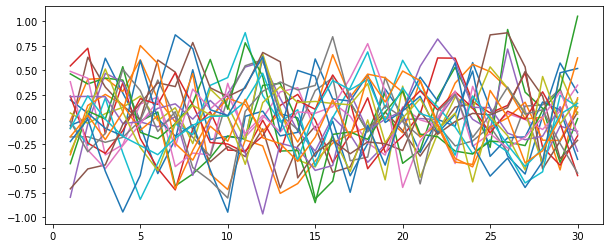

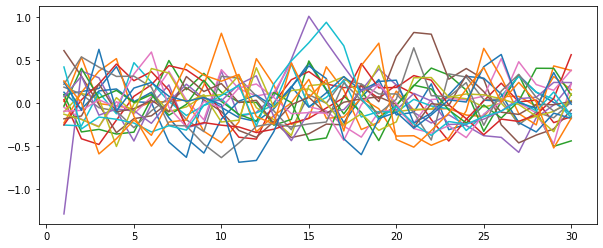

0.1515 0.6943

historical: 1901-1930


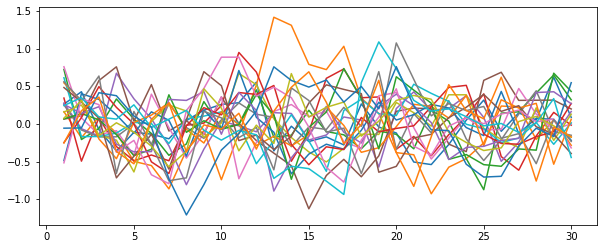

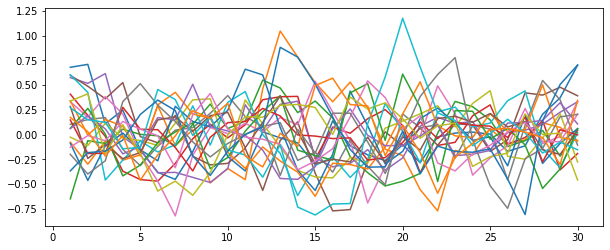

0.303 0.9583

historical 2: 2000-2029


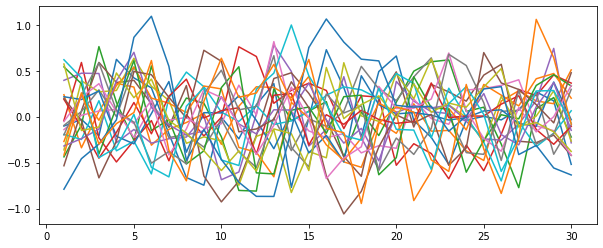

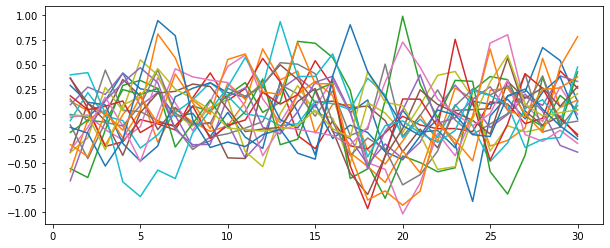

0.303 0.9583

historical 2: 1985-2014


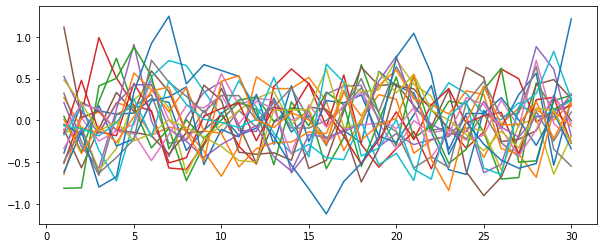

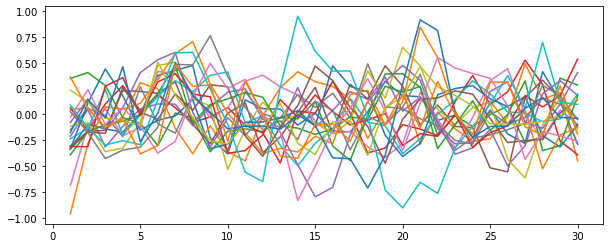

0.0 0.0

future: 2070-2099


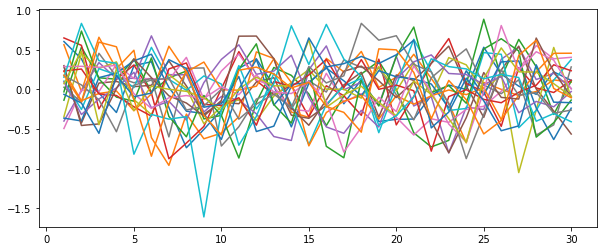

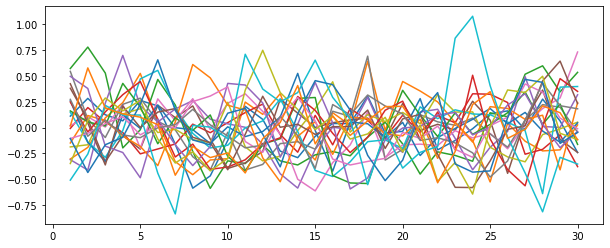

0.4545 1.1439

future: 2040-2069


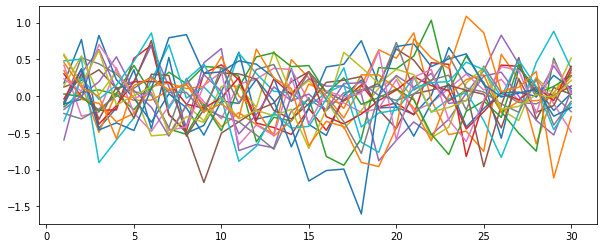

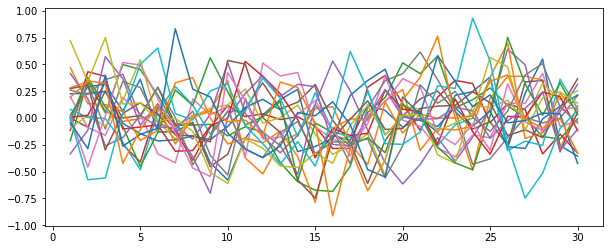

0.6061 1.6319

future: 2016-2045


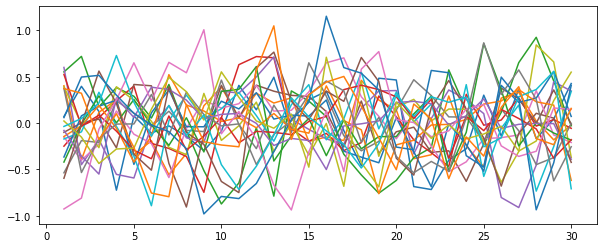

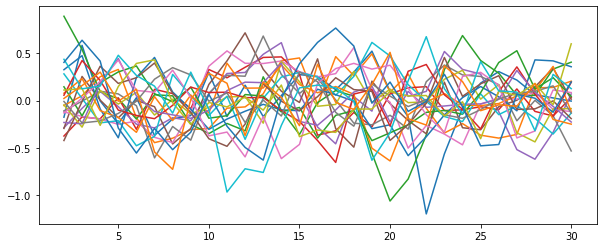

0.1515 0.6943


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.3333333333333335,
 3.3333333333333335,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.3333333333333335,
 0.0]

In [227]:

print ('\nPercentiles: '+str(prc1)+'/'+str(prc2))
print('\nProbable # events in '+str(ny)+' years'+': '+str(ny*0.01))

hinev,funev=freq_difruns(fdir,loc,ny, prc1, prc2)
funev

In [228]:
loc,np.mean(hinev),np.mean(model_mean),np.mean(funev)

('cclme', 0.30303030303030304, 0.17992424242424243, 0.45454545454545453)

In [229]:
N=int(500/ny)
N

16

In [230]:
#hist - picontrol FAR
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(hinev,pinev[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_a=np.asarray(diff).reshape(N,22)
diff_mean=np.mean(diff_a,axis=1)
diff_spread=np.std(diff_mean)
diff_mean.mean(),diff_spread

(0.12310606060606062, 0.17942514508992818)

In [231]:
hinev_a=np.asarray(hinev).sum()#.reshape(N,22).sum(axis=1)
pinev_a=np.asarray(pinev).reshape(N,22).sum(axis=1)
far=(hinev_a-pinev_a)/hinev_a
FAR=np.mean(far)
sd=np.std(far)
FAR,sd

(0.40625, 0.592102978796763)

In [232]:
import statsmodels.api as sm
import statsmodels as sm
import pandas
from patsy import dmatrices
cu,cl=sm.stats.proportion.proportion_confint(FAR, 1, alpha=0.05, method='normal') #'binom_test''normal'
cu,cl

(0.0, 1.0)

In [233]:
#diff=np.mean(funev)-np.mean(hinev)
#diff=funev-hinev
diff=list()
zip_obj=zip(funev,hinev)
for i , j in zip_obj:
        diff.append(i-j)
diff
diff_mean=np.mean(diff)
diff_spread_mme=np.std(diff)
diff_mean,diff_spread_mme-IV,mme_model_spread

(0.15151515151515152, 0.8506715508767515, 0.1794251450899282)

In [234]:
#future - picontrol
#cross-model spread
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(funev,pinev[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_mean=np.mean(diff)
diff_spread=np.std(diff)-IV
diff_mean,diff_spread

(0.27462121212121215, 0.6746343951897509)

In [235]:
#cross-mme spread
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(funev,pinev[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_a=np.asarray(diff).reshape(N,22)
diff_mean=np.mean(diff_a,axis=1)
diff_spread=np.std(diff_mean)
diff_mean.mean(),diff_spread

(0.2746212121212121, 0.17942514508992818)

In [236]:
funev_a=np.asarray(funev).sum()#.reshape(N,22).sum(axis=1)
pinev_a=np.asarray(pinev).reshape(N,22).sum(axis=1)
far=(funev_a-pinev_a)/pinev_a
FAR=np.mean(far)
sd=np.std(far)
FAR=np.mean(far)
cu,cl=sm.stats.proportion.proportion_confint(FAR, 1, alpha=0.05, method='normal') #'binom_test''normal'
FAR,cu,cl,sd

(inf, nan, nan, nan)